## Numpy实现多项式曲线拟合

问题定义：  
对于一堆数据点(x, y)，能否只根据这些数据，找出一个函数，使得函数画出来的曲线和原始数据曲线尽量匹配？

多项式拟合问题：   
任何可微连续的函数，都可以用一个N次多项式来估计，而比N次幂更高阶的部分为无穷小可以忽略不计

3次多项式即：a$x^3$ + b$x^2$ + cx + d  
比如我们可以让sin(x) 约等于 a$x^3$ + b$x^2$ + cx + d

### 1. 构造原始数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x是一个数组，在-5~5，等间距生成的50个点
x = np.linspace(-5, 5, 50)

In [3]:
# 假造y，为sin(x)，同时加上一些噪声，模拟真实世界的数据
y = np.sin(x) + np.random.rand(50)

In [4]:
x.shape, y.shape

((50,), (50,))

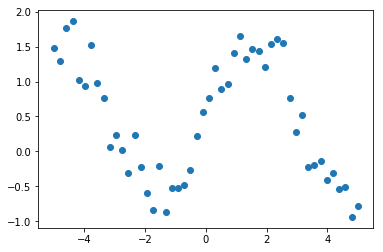

In [5]:
plt.scatter(x, y)

### 2. 使用Numpy拟合

In [6]:
# 使用三次方多项式做拟合
params = np.polyfit(x, y, 10)

In [7]:
params

array([-1.28513153e-06,  2.10418979e-06,  6.01390057e-05, -2.35916644e-04,
       -8.21462341e-04,  1.02159955e-02,  2.44200509e-03, -1.94914249e-01,
        5.73588873e-03,  1.12500364e+00,  4.69260725e-01])

In [8]:
# 构造一个便捷多项式对象
param_func = np.poly1d(params)
param_func

poly1d([-1.28513153e-06,  2.10418979e-06,  6.01390057e-05, -2.35916644e-04,
       -8.21462341e-04,  1.02159955e-02,  2.44200509e-03, -1.94914249e-01,
        5.73588873e-03,  1.12500364e+00,  4.69260725e-01])

In [9]:
# 根据原始的x，计算拟合的y_predict
y_predict = param_func(x)

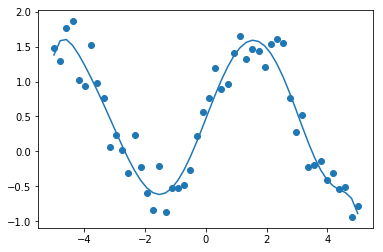

In [10]:
plt.scatter(x, y)
plt.plot(x, y_predict)